# Panel Data
* Goal: Panel Data (prices, market cap) for coins traded on Binance
## Loading All Available Coin/Pairs on Binance

In [98]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import time
import datetime
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [99]:
cg = CoinGeckoAPI()
cg

In [100]:
data = cg.get_exchanges_tickers_by_id(id='binance', page=1)
data

{'name': 'Binance',
 'tickers': [{'base': 'BUSD',
   'target': 'USDT',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive': False},
   'last': 1.0003,
   'volume': 514818744.8957313,
   'converted_last': {'btc': 5.905e-05, 'eth': 0.00079055, 'usd': 1.001},
   'converted_volume': {'btc': 30398, 'eth': 406991, 'usd': 515184132},
   'trust_score': 'green',
   'bid_ask_spread_percentage': 0.019997,
   'timestamp': '2023-01-07T19:58:43+00:00',
   'last_traded_at': '2023-01-07T19:58:43+00:00',
   'last_fetch_at': '2023-01-07T19:58:43+00:00',
   'is_anomaly': False,
   'is_stale': False,
   'trade_url': 'https://www.binance.com/en/trade/BUSD_USDT?ref=37754157',
   'token_info_url': None,
   'coin_id': 'binance-usd',
   'target_coin_id': 'tether'},
  {'base': 'BTC',
   'target': 'USDT',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive': False},
   'last': 16950.48,
   'volume': 120787.46203987313,
   'converted_last'

In [101]:
df = pd.DataFrame(data['tickers'])
df

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BUSD,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",1.000,514818744.896,"{'btc': 5.905e-05, 'eth': 0.00079055, 'usd': 1...","{'btc': 30398, 'eth': 406991, 'usd': 515184132}",green,0.020,2023-01-07T19:58:43+00:00,2023-01-07T19:58:43+00:00,2023-01-07T19:58:43+00:00,False,False,https://www.binance.com/en/trade/BUSD_USDT?ref...,None,binance-usd,tether
1,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",16950.480,120787.462,"{'btc': 1.00015, 'eth': 13.389502, 'usd': 1694...","{'btc': 120806, 'eth': 1617284, 'usd': 2046769...",green,0.011,2023-01-07T20:08:39+00:00,2023-01-07T20:08:39+00:00,2023-01-07T20:08:39+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=...,None,bitcoin,tether
2,BTC,BUSD,"{'name': 'Binance', 'identifier': 'binance', '...",16940.300,52870.531,"{'btc': 1.000315, 'eth': 13.390931, 'usd': 169...","{'btc': 52887, 'eth': 707986, 'usd': 896009100}",green,0.012,2023-01-07T19:59:54+00:00,2023-01-07T19:59:54+00:00,2023-01-07T19:59:54+00:00,False,False,https://www.binance.com/en/trade/BTC_BUSD?ref=...,None,bitcoin,binance-usd
3,ETH,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",1265.400,132211.483,"{'btc': 0.07469321, 'eth': 0.99986274, 'usd': ...","{'btc': 9875, 'eth': 132193, 'usd': 167376342}",green,0.011,2023-01-07T20:02:55+00:00,2023-01-07T20:02:55+00:00,2023-01-07T20:02:55+00:00,False,False,https://www.binance.com/en/trade/ETH_USDT?ref=...,None,ethereum,tether
4,ETH,BUSD,"{'name': 'Binance', 'identifier': 'binance', '...",1265.010,74845.461,"{'btc': 0.07467459, 'eth': 0.99959987, 'usd': ...","{'btc': 5589, 'eth': 74816, 'usd': 94724447}",green,0.011,2023-01-07T20:00:44+00:00,2023-01-07T20:00:44+00:00,2023-01-07T20:00:44+00:00,False,False,https://www.binance.com/en/trade/ETH_BUSD?ref=...,None,ethereum,binance-usd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,RUNE,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",1.375,1114227.816,"{'btc': 8.115e-05, 'eth': 0.00108689, 'usd': 1...","{'btc': 90.421, 'eth': 1211, 'usd': 1532618}",green,0.073,2023-01-07T20:18:51+00:00,2023-01-07T20:18:51+00:00,2023-01-07T20:18:51+00:00,False,False,https://www.binance.com/en/trade/RUNE_USDT?ref...,None,thorchain,tether
96,LUNA,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",1.319,1422781.679,"{'btc': 7.784e-05, 'eth': 0.00104219, 'usd': 1...","{'btc': 110.748, 'eth': 1483, 'usd': 1876991}",green,0.018,2023-01-07T19:58:50+00:00,2023-01-07T19:58:50+00:00,2023-01-07T19:58:50+00:00,False,False,https://www.binance.com/en/trade/LUNA_USDT?ref...,None,terra-luna-2,tether
97,NEAR,BUSD,"{'name': 'Binance', 'identifier': 'binance', '...",1.574,3116738.076,"{'btc': 9.291e-05, 'eth': 0.00124445, 'usd': 1...","{'btc': 289.59, 'eth': 3879, 'usd': 4908522}",green,0.063,2023-01-07T20:18:56+00:00,2023-01-07T20:18:56+00:00,2023-01-07T20:18:56+00:00,False,False,https://www.binance.com/en/trade/NEAR_BUSD?ref...,None,near,binance-usd
98,ETH,TRY,"{'name': 'Binance', 'identifier': 'binance', '...",24120.000,838.353,"{'btc': 0.07591108, 'eth': 1.01624, 'usd': 128...","{'btc': 63.64, 'eth': 851.968, 'usd': 1078205}",green,0.021,2023-01-07T20:03:04+00:00,2023-01-07T20:03:04+00:00,2023-01-07T20:03:04+00:00,False,False,https://www.binance.com/en/trade/ETH_TRY?ref=3...,None,ethereum,NaN


In [102]:
page = 2
while True:
    data = cg.get_exchanges_tickers_by_id(id='binance', page=page)['tickers']
    if len(data) == 0:
        print('Download completed.')
        break
    else:
        df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
        print('Page: {}'.format(page), end='\r')
        page += 1
        time.sleep(2.5)

Download completed.


In [103]:
df

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BUSD,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",1.000,514818744.896,"{'btc': 5.905e-05, 'eth': 0.00079055, 'usd': 1...","{'btc': 30398, 'eth': 406991, 'usd': 515184132}",green,0.020,2023-01-07T19:58:43+00:00,2023-01-07T19:58:43+00:00,2023-01-07T19:58:43+00:00,False,False,https://www.binance.com/en/trade/BUSD_USDT?ref...,None,binance-usd,tether
1,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",16950.480,120787.462,"{'btc': 1.00015, 'eth': 13.389502, 'usd': 1694...","{'btc': 120806, 'eth': 1617284, 'usd': 2046769...",green,0.011,2023-01-07T20:08:39+00:00,2023-01-07T20:08:39+00:00,2023-01-07T20:08:39+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=...,None,bitcoin,tether
2,BTC,BUSD,"{'name': 'Binance', 'identifier': 'binance', '...",16940.300,52870.531,"{'btc': 1.000315, 'eth': 13.390931, 'usd': 169...","{'btc': 52887, 'eth': 707986, 'usd': 896009100}",green,0.012,2023-01-07T19:59:54+00:00,2023-01-07T19:59:54+00:00,2023-01-07T19:59:54+00:00,False,False,https://www.binance.com/en/trade/BTC_BUSD?ref=...,None,bitcoin,binance-usd
3,ETH,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",1265.400,132211.483,"{'btc': 0.07469321, 'eth': 0.99986274, 'usd': ...","{'btc': 9875, 'eth': 132193, 'usd': 167376342}",green,0.011,2023-01-07T20:02:55+00:00,2023-01-07T20:02:55+00:00,2023-01-07T20:02:55+00:00,False,False,https://www.binance.com/en/trade/ETH_USDT?ref=...,None,ethereum,tether
4,ETH,BUSD,"{'name': 'Binance', 'identifier': 'binance', '...",1265.010,74845.461,"{'btc': 0.07467459, 'eth': 0.99959987, 'usd': ...","{'btc': 5589, 'eth': 74816, 'usd': 94724447}",green,0.011,2023-01-07T20:00:44+00:00,2023-01-07T20:00:44+00:00,2023-01-07T20:00:44+00:00,False,False,https://www.binance.com/en/trade/ETH_BUSD?ref=...,None,ethereum,binance-usd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,SHIB,GBP,"{'name': 'Binance', 'identifier': 'binance', '...",0.000,4830571588.154,"{'btc': 4.93372e-10, 'eth': 6.64e-09, 'usd': 8...","{'btc': 2.383268, 'eth': 32.07284, 'usd': 40035}",yellow,0.575,2023-01-06T06:57:13+00:00,2023-01-06T06:57:13+00:00,2023-01-06T07:00:05+00:00,False,True,https://www.binance.com/en/trade/SHIB_GBP?ref=...,None,shiba-inu,NaN
1389,ICX,ETH,"{'name': 'Binance', 'identifier': 'binance', '...",0.000,20457.109,"{'btc': 8.73e-06, 'eth': 0.00011754, 'usd': 0....","{'btc': 0.17864375, 'eth': 2.404492, 'usd': 30...",yellow,0.678,2023-01-06T05:38:01+00:00,2023-01-06T05:38:01+00:00,2023-01-06T06:42:58+00:00,False,True,https://www.binance.com/en/trade/ICX_ETH?ref=3...,None,icon,ethereum
1390,BLZ,ETH,"{'name': 'Binance', 'identifier': 'binance', '...",0.000,10929.301,"{'btc': 3.09e-06, 'eth': 4.159e-05, 'usd': 0.0...","{'btc': 0.03377304, 'eth': 0.45453462, 'usd': ...",yellow,1.541,2023-01-06T05:35:50+00:00,2023-01-06T05:35:50+00:00,2023-01-06T06:58:07+00:00,False,True,https://www.binance.com/en/trade/BLZ_ETH?ref=3...,None,bluzelle,ethereum
1391,CAKE,GBP,"{'name': 'Binance', 'identifier': 'binance', '...",2.714,800.048,"{'btc': 0.00019242, 'eth': 0.00259033, 'usd': ...","{'btc': 0.15394602, 'eth': 2.072391, 'usd': 25...",None,2.348,2023-01-06T06:52:08+00:00,2023-01-06T06:52:08+00:00,2023-01-06T06:52:08+00:00,False,True,https://www.binance.com/en/trade/CAKE_GBP?ref=...,None,pancakeswap-token,NaN


In [104]:
df.coin_id.nunique()

353

In [105]:
df.coin_id.value_counts()

bitcoin          14
ethereum         13
binancecoin      13
matic-network    13
ripple           12
                 ..
tornado-cash      1
ethdown           1
terrausd          1
pnetwork          1
beam              1
Name: coin_id, Length: 353, dtype: int64

In [106]:
df[df.coin_id == 'bitcoin']

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
1,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",16950.480,120787.462,"{'btc': 1.00015, 'eth': 13.389502, 'usd': 1694...","{'btc': 120806, 'eth': 1617284, 'usd': 2046769...",green,0.011,2023-01-07T20:08:39+00:00,2023-01-07T20:08:39+00:00,2023-01-07T20:08:39+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=...,None,bitcoin,tether
2,BTC,BUSD,"{'name': 'Binance', 'identifier': 'binance', '...",16940.300,52870.531,"{'btc': 1.000315, 'eth': 13.390931, 'usd': 169...","{'btc': 52887, 'eth': 707986, 'usd': 896009100}",green,0.012,2023-01-07T19:59:54+00:00,2023-01-07T19:59:54+00:00,2023-01-07T19:59:54+00:00,False,False,https://www.binance.com/en/trade/BTC_BUSD?ref=...,None,bitcoin,binance-usd
24,BTC,EUR,"{'name': 'Binance', 'identifier': 'binance', '...",15918.060,496.805,"{'btc': 1.001893, 'eth': 13.412581, 'usd': 169...","{'btc': 497.745, 'eth': 6663, 'usd': 8432883}",green,0.013,2023-01-07T20:03:05+00:00,2023-01-07T20:03:05+00:00,2023-01-07T20:03:05+00:00,False,False,https://www.binance.com/en/trade/BTC_EUR?ref=3...,None,bitcoin,NaN
28,BTC,GBP,"{'name': 'Binance', 'identifier': 'binance', '...",14013.990,239.449,"{'btc': 0.99993344, 'eth': 13.388065, 'usd': 1...","{'btc': 239.433, 'eth': 3206, 'usd': 4057965}",green,0.018,2023-01-07T19:58:47+00:00,2023-01-07T19:58:47+00:00,2023-01-07T19:58:47+00:00,False,False,https://www.binance.com/en/trade/BTC_GBP?ref=3...,None,bitcoin,NaN
50,BTC,AUD,"{'name': 'Binance', 'identifier': 'binance', '...",24697.720,266.700,"{'btc': 1.002716, 'eth': 13.422431, 'usd': 169...","{'btc': 267.424, 'eth': 3580, 'usd': 4532355}",green,0.022,2023-01-07T20:00:55+00:00,2023-01-07T20:00:55+00:00,2023-01-07T20:00:55+00:00,False,False,https://www.binance.com/en/trade/BTC_AUD?ref=3...,None,bitcoin,NaN
62,BTC,BRL,"{'name': 'Binance', 'identifier': 'binance', '...",89623.000,178.764,"{'btc': 1.011366, 'eth': 13.542586, 'usd': 171...","{'btc': 180.796, 'eth': 2421, 'usd': 3065760}",green,0.011,2023-01-07T20:14:07+00:00,2023-01-07T20:14:07+00:00,2023-01-07T20:14:07+00:00,False,False,https://www.binance.com/en/trade/BTC_BRL?ref=3...,None,bitcoin,NaN
90,BTC,DAI,"{'name': 'Binance', 'identifier': 'binance', '...",16946.310,21.313,"{'btc': 1.00072, 'eth': 13.400168, 'usd': 1696...","{'btc': 21.328219, 'eth': 285.596, 'usd': 361522}",green,0.084,2023-01-07T20:13:16+00:00,2023-01-07T20:13:16+00:00,2023-01-07T20:13:16+00:00,False,False,https://www.binance.com/en/trade/BTC_DAI?ref=3...,None,bitcoin,dai
137,BTC,BIDR,"{'name': 'Binance', 'identifier': 'binance', '...",265588552.000,22.301,"{'btc': 1.000611, 'eth': 13.40167, 'usd': 1696...","{'btc': 22.314607, 'eth': 298.87, 'usd': 378230}",green,0.046,2023-01-07T20:18:52+00:00,2023-01-07T20:18:52+00:00,2023-01-07T20:18:52+00:00,False,False,https://www.binance.com/en/trade/BTC_BIDR?ref=...,None,bitcoin,binanceidr
262,BTC,PLN,"{'name': 'Binance', 'identifier': 'binance', '...",74576.000,14.888,"{'btc': 1.031932, 'eth': 13.817966, 'usd': 174...","{'btc': 15.362895, 'eth': 205.715, 'usd': 260509}",green,0.091,2023-01-07T20:14:20+00:00,2023-01-07T20:14:20+00:00,2023-01-07T20:14:20+00:00,False,False,https://www.binance.com/en/trade/BTC_PLN?ref=3...,None,bitcoin,NaN
268,BTC,RUB,"{'name': 'Binance', 'identifier': 'binance', '...",1227320.000,9.689,"{'btc': 0.99921291, 'eth': 13.376173, 'usd': 1...","{'btc': 9.681776, 'eth': 129.607, 'usd': 164028}",green,0.055,2023-01-07T19:59:58+00:00,2023-01-07T19:59:58+00:00,2023-01-07T19:59:58+00:00,False,False,https://www.binance.com/en/trade/BTC_RUB?ref=3...,None,bitcoin,NaN


In [107]:
coins = list(df.coin_id.unique())
coins

['binance-usd',
 'bitcoin',
 'ethereum',
 'tether',
 'binancecoin',
 'ripple',
 'matic-network',
 'dogecoin',
 'litecoin',
 'solana',
 'cardano',
 'chainlink',
 'ethereum-classic',
 'shiba-inu',
 'gala',
 'tron',
 'cosmos',
 'aptos',
 'avalanche-2',
 'chiliz',
 'the-sandbox',
 'optimism',
 'monero',
 'fantom',
 'polkadot',
 'terra-luna',
 'apecoin',
 'pax-gold',
 'kava',
 'near',
 'algorand',
 'dydx',
 'mask-network',
 'filecoin',
 'uniswap',
 'bitcoin-cash',
 'aave',
 'eos',
 'sushi',
 'jasmycoin',
 'havven',
 'constitutiondao',
 'quant-network',
 'decentraland',
 'axie-infinity',
 'trust-wallet-token',
 'stepn',
 'arweave',
 'ethereum-name-service',
 'lido-dao',
 'thorchain',
 'terra-luna-2',
 'aelf',
 'stellar',
 'zcash',
 'waves',
 'internet-computer',
 'fetch-ai',
 'harmony',
 'terrausd',
 'elrond-erd-2',
 'dash',
 'loopring',
 'band-protocol',
 'safepal',
 'vechain',
 'curve-dao-token',
 'the-graph',
 'flow',
 'yfii-finance',
 'unifi-protocol-dao',
 'audius',
 'hedera-hashgraph',

In [108]:
len(coins)

353

In [109]:
df.target_coin_id.nunique()

13

In [110]:
df.target_coin_id.value_counts()

tether          320
binance-usd     320
bitcoin         281
binancecoin     118
ethereum        105
binanceidr       18
dai               5
rupiah-token      1
polkadot          1
ripple            1
dogecoin          1
tron              1
vai               1
Name: target_coin_id, dtype: int64

In [111]:
# how many coins can be bought with tether or bitcoin
df.loc[df.target_coin_id.isin(['tether','bitcoin'])].coin_id.nunique()

336

## Loading and Cleaning the Panel Data Set

### Loading
#### Time series for one coin

In [112]:
cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='USD', days='max', interval='daily')

{'prices': [[1367107200000, 135.3],
  [1367193600000, 141.96],
  [1367280000000, 135.3],
  [1367366400000, 117.0],
  [1367452800000, 103.43],
  [1367539200000, 91.01],
  [1367625600000, 111.25],
  [1367712000000, 116.79],
  [1367798400000, 118.33],
  [1367884800000, 106.4],
  [1367971200000, 112.64],
  [1368057600000, 113.0],
  [1368144000000, 118.78],
  [1368230400000, 113.01],
  [1368316800000, 114.713],
  [1368403200000, 117.18],
  [1368489600000, 114.5],
  [1368576000000, 114.156],
  [1368662400000, 115.5],
  [1368748800000, 123.1],
  [1368835200000, 123.88],
  [1368921600000, 120.501],
  [1369008000000, 122.58],
  [1369094400000, 122.9],
  [1369180800000, 123.0],
  [1369267200000, 125.748],
  [1369353600000, 131.7],
  [1369440000000, 130.77],
  [1369526400000, 134.6],
  [1369612800000, 128.985],
  [1369699200000, 129.179],
  [1369785600000, 132.13],
  [1369872000000, 127.401],
  [1369958400000, 127.98],
  [1370044800000, 129.09],
  [1370131200000, 121.3],
  [1370217600000, 121.16]

In [113]:
df = pd.DataFrame(columns=['prices','market_caps','total_volumes','symbol'])
df.index.name = 'date'
df

,prices,market_caps,total_volumes,symbol
date,,,,


In [114]:
count = 1
for coin in coins:
    try:
        data = pd.DataFrame(cg.get_coin_market_chart_by_id(id=coin, vs_currency='USD', days='max', interval='daily'))
        df2 = pd.DataFrame(data).applymap(lambda x: x[1])
        dates = pd.to_datetime(pd.DataFrame(data).prices.apply(lambda x: x[0]), unit='ms')
        df2.index = dates
        df2.index.name = 'date'
        df2['symbol'] = coin
        df2 = df2.iloc[:-1]
        df = pd.concat([df, df2])
        print(count, end='\r')
        count += 1
        time.sleep(2.0)

    except Exception as e:
        print(e)

print('Download complete.')

Download complete.


In [115]:
df

,prices,market_caps,total_volumes,symbol
date,,,,
2019-09-21,1.000,0.000,255769.445,binance-usd
2019-09-22,1.001,0.000,182705.827,binance-usd
2019-09-23,1.000,0.000,150076.502,binance-usd
2019-09-24,1.000,0.000,1528187.941,binance-usd
2019-09-25,1.002,0.000,4093715.376,binance-usd
...,...,...,...,...
2023-01-03,0.005,49387419.528,926206.478,mainframe
2023-01-04,0.005,49601327.082,1206349.623,mainframe
2023-01-05,0.005,44270115.852,24483.770,mainframe


In [116]:
df.symbol.nunique()

353

In [117]:
df.loc[df.symbol == 'bitcoin']

,prices,market_caps,total_volumes,symbol
date,,,,
2013-04-28,135.300,1500517590.000,0.000,bitcoin
2013-04-29,141.960,1575032004.000,0.000,bitcoin
2013-04-30,135.300,1501657493.000,0.000,bitcoin
2013-05-01,117.000,1298951550.000,0.000,bitcoin
2013-05-02,103.430,1148667722.000,0.000,bitcoin
...,...,...,...,...
2023-01-03,16674.343,321486454934.268,13023861027.769,bitcoin
2023-01-04,16677.646,321080820418.184,15367167883.495,bitcoin
2023-01-05,16855.175,324397588037.395,20836560771.724,bitcoin


## Cleaning

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426060 entries, 2019-09-21 00:00:00 to 2023-01-07 00:00:00
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   prices         426060 non-null  float64
 1   market_caps    426043 non-null  float64
 2   total_volumes  426060 non-null  float64
 3   symbol         426060 non-null  object 
dtypes: float64(3), object(1)
memory usage: 16.3+ MB


In [119]:
# if not numeric
df['prices'] = pd.to_numeric(df.prices)
df['market_caps'] = pd.to_numeric(df.market_caps)
df['total_volumes'] = pd.to_numeric(df.total_volumes)

In [120]:
df.drop(columns=['total_volumes'], inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426060 entries, 2019-09-21 00:00:00 to 2023-01-07 00:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   prices       426060 non-null  float64
 1   market_caps  426043 non-null  float64
 2   symbol       426060 non-null  object 
dtypes: float64(2), object(1)
memory usage: 13.0+ MB


In [122]:
# missing values
df.loc[df.market_caps.isna()]

,prices,market_caps,symbol
date,,,
2017-04-02,1098.068,NaN,bitcoin
2017-04-02,48.378,NaN,ethereum
2017-04-02,0.000,NaN,dogecoin
2017-04-02,8.012,NaN,litecoin
2014-06-05,1.843,NaN,monero
2017-04-02,20.190,NaN,monero
2017-04-02,58.703,NaN,dash
2017-04-02,0.000,NaN,digibyte
2017-04-02,0.016,NaN,nem


In [123]:
df.market_caps.fillna(method='ffill', inplace=True)

In [124]:
df.describe()

,prices,market_caps
count,426060.000,426060.000
mean,263.643,3406170779.288
std,2749.561,35408991503.714
min,0.000,0.000
25%,0.057,22893500.723
50%,0.474,91680369.238
75%,4.019,411145942.355
max,82070.758,1278797895528.361


In [125]:
df.loc[df.index.time != datetime.time(0, 0, 0, 0)] # not midnight

,prices,market_caps,symbol
date,,,
2017-06-06 23:29:55.701,2903.444,47547556371.076,bitcoin
2017-06-08 23:39:21.692,2824.204,46261410000.681,bitcoin
2018-01-30 00:05:18.718,11095.211,186776632503.018,bitcoin
2018-02-08 00:05:28.226,7611.610,128271617562.325,bitcoin
2018-01-30 00:05:11.070,1161.909,113043826616.747,ethereum
...,...,...,...
2018-02-08 00:05:20.484,0.203,706026559.069,status
2018-01-30 00:05:23.653,0.547,456446431.012,golem
2018-02-08 00:05:21.029,0.334,278530882.630,golem


In [126]:
df.loc['2017-6'].head(30)

,prices,market_caps,symbol
date,,,
2017-06-01 00:00:00.000,2436.036,39868442921.866,bitcoin
2017-06-02 00:00:00.000,2514.227,41152717323.668,bitcoin
2017-06-03 00:00:00.000,2562.540,41949676689.000,bitcoin
2017-06-04 00:00:00.000,2556.405,41854068527.985,bitcoin
2017-06-05 00:00:00.000,2721.552,44563721217.188,bitcoin
2017-06-06 23:29:55.701,2903.444,47547556371.076,bitcoin
2017-06-07 00:00:00.000,2716.059,44484425844.040,bitcoin
2017-06-08 23:39:21.692,2824.204,46261410000.681,bitcoin
2017-06-09 00:00:00.000,2817.064,46149913864.145,bitcoin


In [127]:
# set all to midnight
df.index = pd.to_datetime(df.index.date)
df.index.name = 'date'

In [128]:
# reset index for duplicate date-symbol check
df.reset_index(inplace=True)
df

,date,prices,market_caps,symbol
0,2019-09-21,1.000,0.000,binance-usd
1,2019-09-22,1.001,0.000,binance-usd
2,2019-09-23,1.000,0.000,binance-usd
3,2019-09-24,1.000,0.000,binance-usd
4,2019-09-25,1.002,0.000,binance-usd
...,...,...,...,...
426055,2023-01-03,0.005,49387419.528,mainframe
426056,2023-01-04,0.005,49601327.082,mainframe
426057,2023-01-05,0.005,44270115.852,mainframe
426058,2023-01-06,0.005,43119005.092,mainframe


In [129]:
df[df.duplicated(subset=['date','symbol'], keep=False)]

,date,prices,market_caps,symbol


In [130]:
df.drop_duplicates(subset=['date','symbol'], keep='first', inplace=True)

In [131]:
max_mcap = df.groupby('symbol').market_caps.max()
max_mcap

symbol
0x                   1816326873.612
1inch                1823543507.195
aave                 7953335447.113
aavegotchi            229696251.300
ac-milan-fan-token     33858563.736
                          ...      
zcash                3529497594.360
zcoin                 523481672.890
zelcash               701484497.443
zencash              1638919133.936
zilliqa              2850379352.103
Name: market_caps, Length: 353, dtype: float64

In [132]:
to_delete = max_mcap[max_mcap == 0].index
to_delete

Index(['binance-eth', 'binance-wrapped-dot', 'ellipsis-x', 'ethdown', 'ethup',
       'fc-porto', 'highstreet', 'hooked-protocol', 'loom-network-new',
       'mines-of-dalarnia', 'mobilecoin', 'ong', 'threshold-network-token'],
      dtype='object', name='symbol')

In [133]:
df = df.loc[~df.symbol.isin(to_delete)].copy()
df

,date,prices,market_caps,symbol
0,2019-09-21,1.000,0.000,binance-usd
1,2019-09-22,1.001,0.000,binance-usd
2,2019-09-23,1.000,0.000,binance-usd
3,2019-09-24,1.000,0.000,binance-usd
4,2019-09-25,1.002,0.000,binance-usd
...,...,...,...,...
426055,2023-01-03,0.005,49387419.528,mainframe
426056,2023-01-04,0.005,49601327.082,mainframe
426057,2023-01-05,0.005,44270115.852,mainframe
426058,2023-01-06,0.005,43119005.092,mainframe


In [134]:
df.symbol.nunique()

340

In [135]:
df.set_index('date', inplace=True)
df

,prices,market_caps,symbol
date,,,
2019-09-21,1.000,0.000,binance-usd
2019-09-22,1.001,0.000,binance-usd
2019-09-23,1.000,0.000,binance-usd
2019-09-24,1.000,0.000,binance-usd
2019-09-25,1.002,0.000,binance-usd
...,...,...,...
2023-01-03,0.005,49387419.528,mainframe
2023-01-04,0.005,49601327.082,mainframe
2023-01-05,0.005,44270115.852,mainframe


In [136]:
wide = df.pivot(columns='symbol')
wide

prices                                                         \
symbol         0x 1inch   aave aavegotchi ac-milan-fan-token acala  adex   
date                                                                       
2013-04-28    NaN   NaN    NaN        NaN                NaN   NaN   NaN   
2013-04-29    NaN   NaN    NaN        NaN                NaN   NaN   NaN   
2013-04-30    NaN   NaN    NaN        NaN                NaN   NaN   NaN   
2013-05-01    NaN   NaN    NaN        NaN                NaN   NaN   NaN   
2013-05-02    NaN   NaN    NaN        NaN                NaN   NaN   NaN   
...           ...   ...    ...        ...                ...   ...   ...   
2023-01-03  0.156 0.396 53.129      0.985              2.348 0.117 0.115   
2023-01-04  0.155 0.387 53.052      0.976              2.399 0.115 0.113   
2023-01-05  0.158 0.396 56.831      0.984              2.442 0.117 0.116   
2023-01-06  0.157 0.389 55.426      0.977              2.608 0.116 0.118   
2023-01-07  0.161 0.398 56.465      0.980              2.548 0.116 0.118   

                                       ...     market_caps               \
symbol     adventure-gold  aelf aergo  ... wrapped-bitcoin  wrapped-nxm   
date                                   ...                                
2013-04-28            NaN   NaN   NaN  ...             NaN          NaN   
2013-04-29            NaN   NaN   NaN  ...             NaN          NaN   
2013-04-30            NaN   NaN   NaN  ...             NaN          NaN   
2013-05-01            NaN   NaN   NaN  ...             NaN          NaN   
2013-05-02            NaN   NaN   NaN  ...             NaN          NaN   
...                   ...   ...   ...  ...             ...          ...   
2023-01-03          0.274 0.163 0.090  ...  3050869318.412 20969582.687   
2023-01-04          0.274 0.162 0.089  ...  3057841566.243 20537769.355   
2023-01-05          0.274 0.169 0.092  ...  3085469289.740 21145065.909   
2023-01-06          0.270 0.168 0.091  ...  3073405728.540 20455665.180   
2023-01-07          0.273 0.170 0.092  ...  3101172229.123 20883129.396   

                                                                       \
symbol     yearn-finance yfii-finance yield-guild-games         zcash   
date                                                                    
2013-04-28           NaN          NaN               NaN           NaN   
2013-04-29           NaN          NaN               NaN           NaN   
2013-04-30           NaN          NaN               NaN           NaN   
2013-05-01           NaN          NaN               NaN           NaN   
2013-05-02           NaN          NaN               NaN           NaN   
...                  ...          ...               ...           ...   
2023-01-03 176106308.700 47669166.170      31243820.806 519588208.139   
2023-01-04 174377353.797 46849547.583      30632180.948 526308074.279   
2023-01-05 176144320.458 47403189.556      32658748.169 534191176.669   
2023-01-06 176499968.998 46740691.912      32194044.988 524482351.128   
2023-01-07 178565173.032 47008739.580      32357191.577 544887226.211   

                                                                   
symbol            zcoin       zelcash       zencash       zilliqa  
date                                                               
2013-04-28          NaN           NaN           NaN           NaN  
2013-04-29          NaN           NaN           NaN           NaN  
2013-04-30          NaN           NaN           NaN           NaN  
2013-05-01          NaN           NaN           NaN           NaN  
2013-05-02          NaN           NaN           NaN           NaN  
...                 ...           ...           ...           ...  
2023-01-03 19066703.508 144541391.033 123866173.053 282420473.272  
2023-01-04 18910022.510 141552059.064 119216559.876 282555825.392  
2023-01-05 19236353.428 145522566.125 118855721.626 287967068.304  
2023-01-06 19692205.352 144953352.340 115655167.348 2878

In [138]:
wide.index.is_unique

True

In [140]:
start = wide.index[0].date()
start

datetime.date(2013, 4, 28)

In [142]:
end = wide.index[-1].date()
end

datetime.date(2023, 1, 7)

In [143]:
index = pd.date_range(start=start, end=end, freq='D')
index

DatetimeIndex(['2013-04-28', '2013-04-29', '2013-04-30', '2013-05-01',
               '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05',
               '2013-05-06', '2013-05-07',
               ...
               '2022-12-29', '2022-12-30', '2022-12-31', '2023-01-01',
               '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-07'],
              dtype='datetime64[ns]', length=3542, freq='D')

In [144]:
wide.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3542 entries, 2013-04-28 to 2023-01-07
Columns: 680 entries, ('prices', '0x') to ('market_caps', 'zilliqa')
dtypes: float64(680)
memory usage: 18.5 MB


In [145]:
wide.isna().sum().sort_values().head(20)

             symbol   
market_caps  bitcoin        2
             litecoin       2
prices       bitcoin        2
             litecoin       2
             ripple       103
market_caps  ripple       103
             dogecoin     234
prices       dogecoin     234
market_caps  digibyte     285
prices       digibyte     285
market_caps  dash         295
prices       dash         295
             monero       390
market_caps  monero       390
prices       bitshares    455
market_caps  bitshares    455
prices       stellar      471
market_caps  stellar      471
prices       syscoin      480
market_caps  syscoin      480
dtype: int64

In [146]:
wide[wide.prices.bitcoin.isna()]

prices                                                      \
symbol         0x 1inch aave aavegotchi ac-milan-fan-token acala adex   
date                                                                    
2013-06-04    NaN   NaN  NaN        NaN                NaN   NaN  NaN   
2015-01-28    NaN   NaN  NaN        NaN                NaN   NaN  NaN   

                                      ...     market_caps              \
symbol     adventure-gold aelf aergo  ... wrapped-bitcoin wrapped-nxm   
date                                  ...                               
2013-06-04            NaN  NaN   NaN  ...             NaN         NaN   
2015-01-28            NaN  NaN   NaN  ...             NaN         NaN   

                                                                             \
symbol     yearn-finance yfii-finance yield-guild-games zcash zcoin zelcash   
date                                                                          
2013-06-04           NaN          NaN               NaN   NaN   NaN     NaN   
2015-01-28           NaN          NaN               NaN   NaN   NaN     NaN   

                            
symbol     zencash zilliqa  
date                        
2013-06-04     NaN     NaN  
2015-01-28     NaN     NaN  

[2 rows x 680 columns]

In [147]:
wide[wide.prices.litecoin.isna()]

prices                                                      \
symbol         0x 1inch aave aavegotchi ac-milan-fan-token acala adex   
date                                                                    
2013-05-29    NaN   NaN  NaN        NaN                NaN   NaN  NaN   
2015-01-28    NaN   NaN  NaN        NaN                NaN   NaN  NaN   

                                      ...     market_caps              \
symbol     adventure-gold aelf aergo  ... wrapped-bitcoin wrapped-nxm   
date                                  ...                               
2013-05-29            NaN  NaN   NaN  ...             NaN         NaN   
2015-01-28            NaN  NaN   NaN  ...             NaN         NaN   

                                                                             \
symbol     yearn-finance yfii-finance yield-guild-games zcash zcoin zelcash   
date                                                                          
2013-05-29           NaN          NaN               NaN   NaN   NaN     NaN   
2015-01-28           NaN          NaN               NaN   NaN   NaN     NaN   

                            
symbol     zencash zilliqa  
date                        
2013-05-29     NaN     NaN  
2015-01-28     NaN     NaN  

[2 rows x 680 columns]

In [148]:
wide = wide.fillna(method='ffill', limit=2)

In [149]:
import matplotlib.pyplot as plt

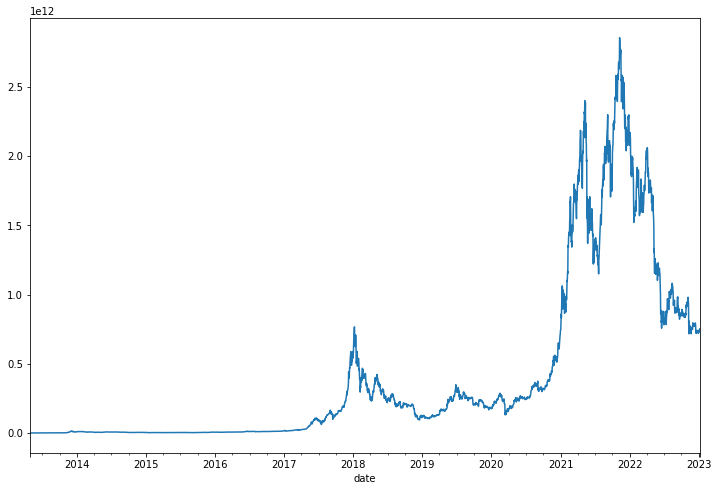

In [150]:
wide.market_caps.sum(axis=1).plot(figsize=(12,8))
plt.show()

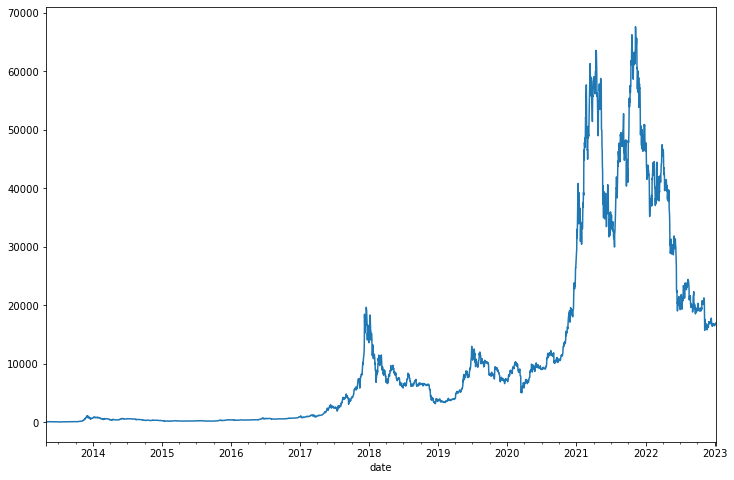

In [151]:
wide.prices.bitcoin.plot(figsize=(12,8))
plt.show()

In [152]:
wide.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3542 entries, 2013-04-28 to 2023-01-07
Columns: 680 entries, ('prices', '0x') to ('market_caps', 'zilliqa')
dtypes: float64(680)
memory usage: 18.5 MB


#### Convert from wide format to long format

In [153]:
stack = wide.stack().reset_index().set_index('date')
stack

,symbol,prices,market_caps
date,,,
2013-04-28,bitcoin,135.300,1500517590.000
2013-04-28,litecoin,4.300,73773387.000
2013-04-29,bitcoin,141.960,1575032004.000
2013-04-29,litecoin,4.359,74936909.000
2013-04-30,bitcoin,135.300,1501657493.000
...,...,...,...
2023-01-07,zcash,41.439,544887226.211
2023-01-07,zcoin,1.656,19698982.012
2023-01-07,zelcash,0.508,145378713.891


In [154]:
stack.loc[stack.symbol == 'bitcoin']

,symbol,prices,market_caps
date,,,
2013-04-28,bitcoin,135.300,1500517590.000
2013-04-29,bitcoin,141.960,1575032004.000
2013-04-30,bitcoin,135.300,1501657493.000
2013-05-01,bitcoin,117.000,1298951550.000
2013-05-02,bitcoin,103.430,1148667722.000
...,...,...,...
2023-01-03,bitcoin,16674.343,321486454934.268
2023-01-04,bitcoin,16677.646,321080820418.184
2023-01-05,bitcoin,16855.175,324397588037.395


In [155]:
stack.to_csv('data/my_panel.csv', index=False)